In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [9]:
df_average_sleep_quality_duration_per_age = pd.read_csv("../data_queries_carlota/1_1_average_sleep_quality_duration_per_age.csv")
df_average_total_of_sleep_duration = pd.read_csv("../data_queries_carlota/avg_total_of_sleep_duration.csv")
df_average_total_of_sleep_quality = pd.read_csv("../data_queries_carlota/avg_total_of_sleep_quality.csv")

In [13]:
avg_sleep_duration = df_average_total_of_sleep_duration['average_total_of_sleep_duration'][0]
avg_sleep_duration

np.float64(7.13)

In [14]:
avg_sleep_quality = df_average_total_of_sleep_quality['average_total_of_sleep_quality'][0]
avg_sleep_quality

np.float64(7.31)

In [7]:
df_average_sleep_quality_duration_per_age

,avg_sleep_quality,avg_sleep_duration,age
0,9.00,8.09,59
1,9.00,8.00,58
2,9.00,8.16,57
3,9.00,8.20,56
4,9.00,8.10,55
5,9.00,8.41,54
6,9.00,8.42,53
7,7.67,7.18,52
8,7.63,7.41,51
9,6.15,6.15,50


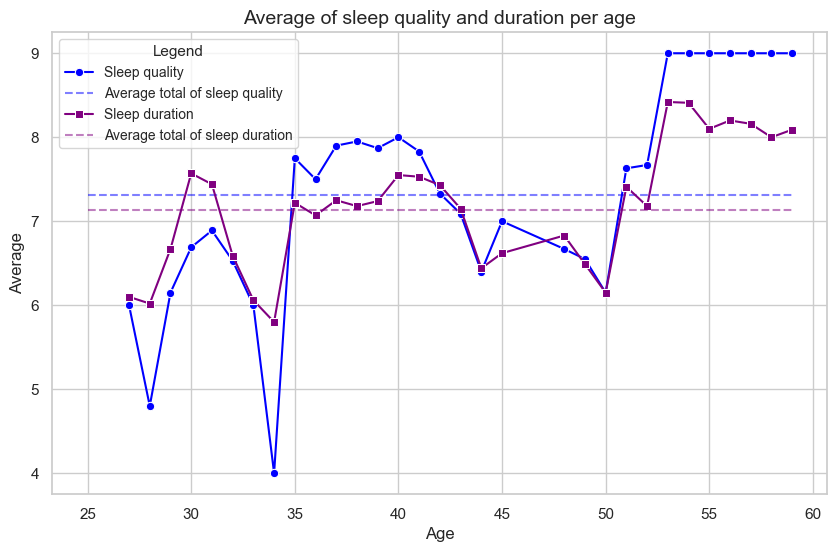

In [19]:
sns.set(style="whitegrid")

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Sleep quality
sns.lineplot(
    x='age', y='avg_sleep_quality', data=df_average_sleep_quality_duration_per_age, 
    marker='o', color='blue', label='Sleep quality', ax=ax
)

sns.lineplot(
    x=np.arange(25, 60), 
    y=avg_sleep_quality,  
    #marker='o',           
    color='blue',        
    label='Average total of sleep quality',
    ax=ax,
    linestyle='--', 
    alpha = 0.5      
)
# Sleep duration
sns.lineplot(
    x='age', y='avg_sleep_duration', data=df_average_sleep_quality_duration_per_age, 
    marker='s', color='purple', label='Sleep duration', ax=ax
)
sns.lineplot(
    x=np.arange(25, 60), 
    y=avg_sleep_duration,  
    #marker='o',           
    color='purple',        
    label='Average total of sleep duration',
    ax=ax,
    linestyle='--', 
    alpha = 0.5      
)


ax.set_title('Average of sleep quality and duration per age', fontsize=14)
ax.set_xlabel('Age', fontsize=12)
ax.set_ylabel('Average', fontsize=12)
ax.legend(title='Legend', fontsize=10, title_fontsize=11)
#ax.invert_xaxis()  

# Mostrar gráfico
plt.show()

In [21]:
df_avg_sleep_quality_diagnosis_age_range = pd.read_csv("../data_queries_carlota/1_5_avg_sleep_quality_diagnosis_age_range.csv")

In [22]:
df_avg_sleep_quality_diagnosis_age_range

,age_range,avg_sleep_quality,diagnosis,diagnosis_count
0,36-50,6.49,Major Depressive Disorder,43
1,51-65,6.11,Major Depressive Disorder,28
2,19-35,5.92,Major Depressive Disorder,53
3,51-65,6.42,Panic Disorder,26
4,19-35,6.73,Panic Disorder,55
5,51-65,6.35,Generalized Anxiety,40
6,36-50,6.30,Panic Disorder,30
7,36-50,6.82,Generalized Anxiety,38
8,19-35,6.65,Bipolar Disorder,49
9,36-50,6.70,Bipolar Disorder,46


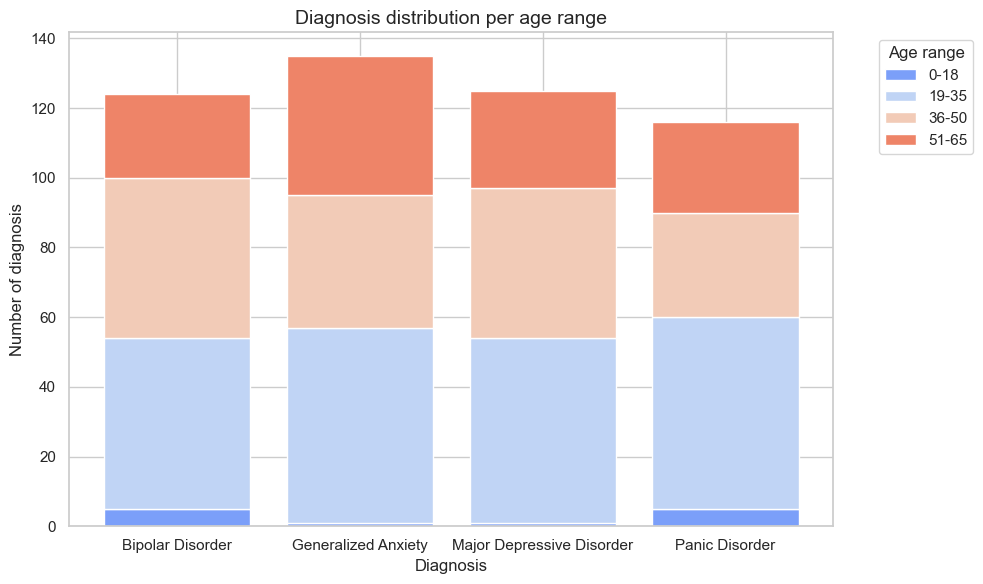

In [28]:

pivot_df = df_avg_sleep_quality_diagnosis_age_range.pivot_table(index="diagnosis", columns="age_range", values="diagnosis_count", aggfunc="sum", fill_value=0)


cumulative_values = pivot_df.cumsum(axis=1)

# Colors
colors = sns.color_palette("coolwarm", len(pivot_df.columns))



fig, ax = plt.subplots(figsize=(10, 6))


for i, col in enumerate(pivot_df.columns):
    
    if i == 0:
        bottom_values = None
    else:
        bottom_values = cumulative_values.iloc[:, i - 1]
    

    ax.bar(
        pivot_df.index,  
        pivot_df[col],  
        bottom=bottom_values,  
        label=col,      
        color=colors[i]  
    )

# Etiquetas y leyenda
ax.set_title("Diagnosis distribution per age range", fontsize=14)
ax.set_xlabel("Diagnosis", fontsize=12)
ax.set_ylabel("Number of diagnosis", fontsize=12)
ax.legend(title="Age range", bbox_to_anchor=(1.05, 1), loc="upper left")

# Mostrar la gráfica
plt.tight_layout()
plt.show()

In [29]:
df_avg_sleep_quality_diagnosis_age = pd.read_csv("../data_queries_carlota/1_6_avg_sleep_quality_diagnosis_age_counter.csv")

In [30]:
df_avg_sleep_quality_diagnosis_age

,age,avg_sleep_quality,diagnosis,diagnosis_count
0,43,8.00,Major Depressive Disorder,1
1,40,5.86,Major Depressive Disorder,7
2,55,5.75,Major Depressive Disorder,4
3,34,5.00,Major Depressive Disorder,3
4,52,5.75,Panic Disorder,4
...,...,...,...,...
156,59,5.50,Bipolar Disorder,2
157,18,7.00,Generalized Anxiety,1
158,37,4.00,Panic Disorder,1
159,36,5.00,Generalized Anxiety,1
